Using XGBoost to train classification model off CSAC Clock datasets.

In [1]:
import torch, os
import numpy as np
from dataHandler import ClockDataset

MODEL_FOLDER = os.path.join(os.getcwd(), 'models')
IMGS_FOLDER = os.path.join(os.getcwd(), 'imgs')
TEST_DATASET = os.path.join(os.getcwd(), 'data/test')
TRAIN_DATASET = os.path.join(os.getcwd(), 'data/train')

device = 'cuda' if torch.cuda.is_available() else 'cpu'
seed = torch.manual_seed(42)

train_dataset = ClockDataset(f_data=TRAIN_DATASET, transform=False)
test_dataset = ClockDataset(f_data=TEST_DATASET, transform=False)

### Training

Training XGBoost algorithm accounting for epochs and learning rate.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import xgboost as xgb
import time

EPOCHS = 10
LR = 0.3 # Values between 0-1, Default: 0.3

xgb_model = xgb.XGBClassifier(use_label_encoder=False, verbosity=0 ,eval_metric='logloss', learning_rate=LR)

print('Beginning Training')
for epoch in range(EPOCHS):
    start_time = time.perf_counter()

    for data in train_dataset:
        X, y, cols, sn, valid = data

        if valid != 'pass':
            # XGBoost needs y to have both classes 0 and 1. 
            # Setting the first element in this dataset from 1 to 0 as to not skew to many data points.
            if sn == '0015700674':
                y[0] = torch.tensor(0)
                
            X_train, X_test, y_train, y_test = train_test_split(
                X.numpy(),
                y.numpy(),
                test_size=0.2,
                random_state=42
            )
            
            xgb_model.fit(X_train, y_train)
            y_pred = xgb_model.predict(X_test)

            acc = accuracy_score(y_test, y_pred)
            cm = confusion_matrix(y_test, y_pred)
            class_report = classification_report(y_test, y_pred)

            #print(f"Clock SN: {sn} | Accuracy: {acc * 100:.2f}%")
            #print(cm)
            #print(class_report)
    end_time = time.perf_counter() - start_time
    print(f"Epoch: {epoch} | Time: {end_time:.2f} s")

Beginning Training


c:\Users\btehrani\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Epoch: 0 | Time: 70.89 s


c:\Users\btehrani\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Epoch: 1 | Time: 62.32 s


c:\Users\btehrani\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Epoch: 2 | Time: 62.21 s


c:\Users\btehrani\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Epoch: 3 | Time: 58.15 s


c:\Users\btehrani\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Epoch: 4 | Time: 57.28 s


c:\Users\btehrani\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Epoch: 5 | Time: 57.14 s


c:\Users\btehrani\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Epoch: 6 | Time: 54.57 s


c:\Users\btehrani\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Epoch: 7 | Time: 58.87 s


c:\Users\btehrani\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Epoch: 8 | Time: 55.13 s


c:\Users\btehrani\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Epoch: 9 | Time: 53.67 s


### Validation and Testing

Making predictions from XGBoost model and plotting the results.

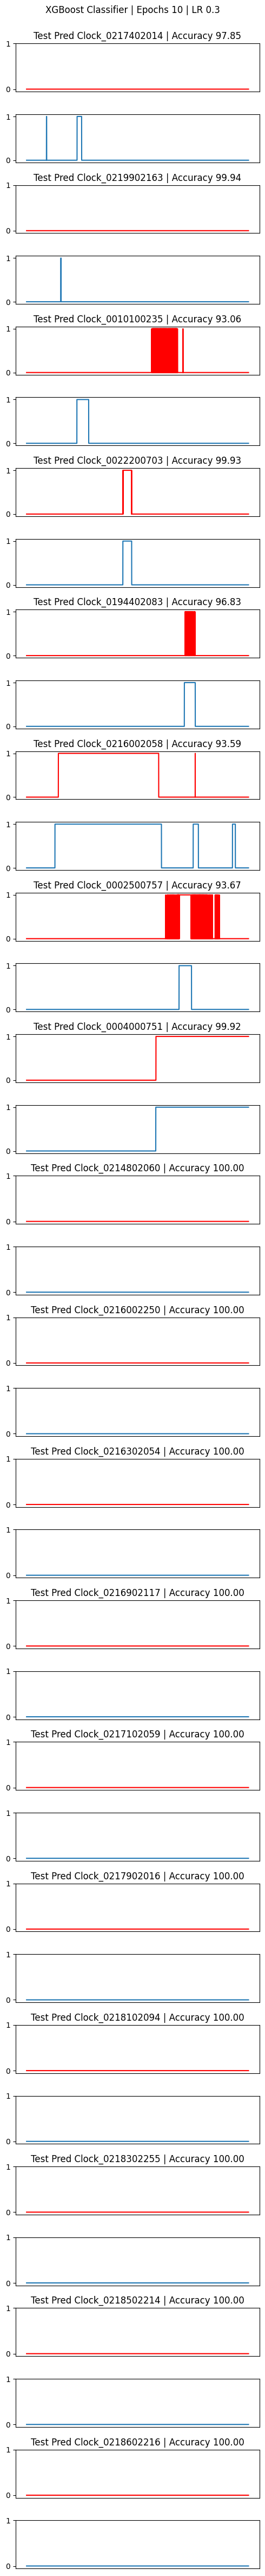

In [3]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(nrows=2*test_dataset.__len__(), ncols=1, figsize=(5, 50))
i=0
fig.suptitle(f"XGBoost Classifier | Epochs {EPOCHS} | LR {LR}", va='top')

for data in test_dataset:
    X, y, cols, sn, v = data

    y_preds = xgb_model.predict(X.numpy())
    acc = accuracy_score(y.numpy(), y_preds)

    ax[i].plot(y_preds, c='r')
    #ax[i].axis("off")
    ax[i].set_xticks([])
    ax[i].set_yticks([0,1])
    ax[i].set_title(f'Test Pred Clock_{sn} | Accuracy {acc * 100:.2f}')
    ax[i+1].plot(y.numpy())
    ax[i+1].set_xticks([])
    ax[i+1].set_yticks([0,1])
    #ax[i+1].axis("off")
    i = i+2
    
lr = str(LR)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig(IMGS_FOLDER + f'/xgboost_epochs-{EPOCHS}_lr_{lr[2:]}')

In [4]:
xgb_model.save_model(MODEL_FOLDER + f'/model_xgboost_EPOCHS-{EPOCHS}_lr-{lr[2:]}.json')